In [1]:
import csv
import pandas
from sklearn.tree import DecisionTreeClassifier as clf
from sklearn import preprocessing
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn import metrics
import pickle

In [16]:
#merge de los dos dataframes en uno
df = pandas.read_csv('adult_train.csv')
df2 = pandas.read_csv('adult_test.csv')
frames = [df, df2]
result = pandas.concat(frames)

In [3]:
#pasar el dataframe por un codificador que pasa los elementos a numerico
codificadores = []
result_codificado = pandas.DataFrame()
for variable, valores in result.iteritems():
    le = preprocessing.LabelEncoder()
    le.fit(valores)
    codificadores.append(le)
    result_codificado[variable] = le.transform(valores)

In [4]:
result_codificado.shape

(48840, 13)

In [5]:
#Split del dataframe en dos uno del conjunto de entrenamiento y otro para el test
df = result_codificado.iloc[:32559,:]
df2 = result_codificado.iloc[32560:,:]

In [6]:
df2.shape

(16280, 13)

In [7]:
df.head(10)

39  2174  0  40  State-gov  Bachelors  Never-married  Adm-clerical  \
0  33     0  0  12          5          9              2             3   
1  21     0  0  39          3         11              0             5   
2  36     0  0  39          3          1              2             5   
3  11     0  0  39          3          9              2             9   
4  20     0  0  39          3         12              2             3   
5  32     0  0  15          3          6              3             7   
6  35     0  0  44          5         11              2             3   
7  14   109  0  49          3         12              4             9   
8  25    81  0  39          3          9              2             3   
9  20     0  0  78          3         15              2             3   

   Not-in-family  White  Male  United-States  less_than_50K  
0              0      4     1             38              0  
1              1      4     1             38              0  
2              0      2     1             38              0  
3              5      2     0              4              0  
4              5      4     0             38              0  
5              1      2     0             22              0  
6              0      4     1             38              1  
7              1      4     0             38              1  
8              0      4     1             38              1  
9              0      2     1             38              1

In [7]:
#bootstraping de N rows del dataframe con replazamiento
boot=(df.sample(df.shape[0],replace=True))
boot.head(10)

39  2174   0  40  State-gov  Bachelors  Never-married  Adm-clerical  \
5134   25     0   0  39          3          5              6             2   
14181  35     0   0  39          3         11              2            13   
22724   6     0   0  15          3         11              4             0   
26180  29     0   0  39          3          0              0             6   
30222  27     0  49  54          3         15              5             2   
6701    7     0   0  49          3         11              2             3   
10596  18     0   0  39          6         12              4             9   
19648   2     0   0  19          3         11              4            11   
24794  12     0   0  39          3         11              2             0   
24876  19     0   0  39          6          8              3            10   

       Not-in-family  White  Male  United-States  less_than_50K  
5134               4      4     1             38              0  
14181              5      4     0             38              0  
22724              3      4     0             38              0  
26180              4      2     1             38              0  
30222              1      4     1             38              0  
6701               0      4     1             38              0  
10596              1      4     0             38              0  
19648              4      2     0             38              0  
24794              5      2     0             38              0  
24876              3      4     0             10              0

In [8]:
#Subspace Method eligiendo 9 columnas + columna del sueldo asegurando que aparezca en el selector random dandole + peso
boot2=boot.sample(10, weights=[0.01, 0.01, 0.01, 0.01, 0.01,0.01,0.01,0.01,0.01,0.01,0.01, 0.01,0.89],axis=1)
boot2.head(10)

less_than_50K  Adm-clerical  40   0  2174  39  Not-in-family  Male  \
5134               0             2  39   0     0  25              4     1   
14181              0            13  39   0     0  35              5     0   
22724              0             0  15   0     0   6              3     0   
26180              0             6  39   0     0  29              4     1   
30222              0             2  54  49     0  27              1     1   
6701               0             3  49   0     0   7              0     1   
10596              0             9  39   0     0  18              1     0   
19648              0            11  19   0     0   2              4     0   
24794              0             0  39   0     0  12              5     0   
24876              0            10  39   0     0  19              3     0   

       State-gov  White  
5134           3      4  
14181          3      4  
22724          3      4  
26180          3      2  
30222          3      4  
6701           3      4  
10596          6      4  
19648          3      2  
24794          3      2  
24876          6      4

In [9]:
cc2 = boot2.iloc[:,1:10]
cc2.head(10)

Adm-clerical  40   0  2174  39  Not-in-family  Male  State-gov  White
5134              2  39   0     0  25              4     1          3      4
14181            13  39   0     0  35              5     0          3      4
22724             0  15   0     0   6              3     0          3      4
26180             6  39   0     0  29              4     1          3      2
30222             2  54  49     0  27              1     1          3      4
6701              3  49   0     0   7              0     1          3      4
10596             9  39   0     0  18              1     0          6      4
19648            11  19   0     0   2              4     0          3      2
24794             0  39   0     0  12              5     0          3      2
24876            10  39   0     0  19              3     0          6      4

In [10]:
#guardar la lista de columnas seleccionadas
ldc=boot2.iloc[:,1:10].columns.values

In [11]:
cc3 = boot2['less_than_50K']
cc3.head(10)

5134     0
14181    0
22724    0
26180    0
30222    0
6701     0
10596    0
19648    0
24794    0
24876    0
Name: less_than_50K, dtype: int32

In [12]:
algo=tree.DecisionTreeClassifier()

In [13]:
clf_train = algo.fit(cc2,cc3)

In [14]:
arboles = []

In [15]:
arboles.append(clf_train)

In [288]:
print(tree.export_graphviz(clf_train, None))

digraph Tree {
node [shape=box] ;
0 [label="X[5] <= 0.5\ngini = 0.365\nsamples = 32559\nvalue = [24734, 7825]"] ;
1 [label="X[4] <= 80.0\ngini = 0.494\nsamples = 13099\nvalue = [7241, 5858]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= 42.5\ngini = 0.48\nsamples = 12059\nvalue = [7234, 4825]"] ;
1 -> 2 ;
3 [label="X[8] <= 6.5\ngini = 0.467\nsamples = 11359\nvalue = [7129, 4230]"] ;
2 -> 3 ;
4 [label="X[4] <= 69.0\ngini = 0.176\nsamples = 1450\nvalue = [1309, 141]"] ;
3 -> 4 ;
5 [label="X[1] <= 48.0\ngini = 0.171\nsamples = 1442\nvalue = [1306, 136]"] ;
4 -> 5 ;
6 [label="X[8] <= 2.5\ngini = 0.146\nsamples = 1196\nvalue = [1101, 95]"] ;
5 -> 6 ;
7 [label="X[7] <= 4.5\ngini = 0.207\nsamples = 545\nvalue = [481, 64]"] ;
6 -> 7 ;
8 [label="X[7] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
8 -> 9 ;
10 [label="X[8] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]"] ;
8 -> 10 ;
11 [lab

In [289]:
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(ldc), 
                                class_names=['less_than_50K','more_than_50K'], rounded=True, filled=True)

In [290]:
graph = pydotplus.graph_from_dot_data(dot_data)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.256861 to fit



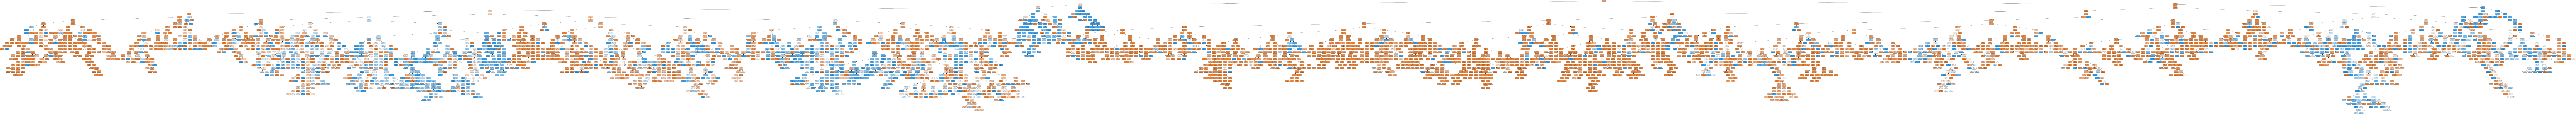

In [291]:
Image(graph.create_png())

In [292]:
df2.head(10)

39  2174  0  40  State-gov  Bachelors  Never-married  Adm-clerical  \
32560  21     0  0  49          3         11              2             4   
32561  11     0  0  39          1          7              2            10   
32562  27    98  0  39          3         15              2             6   
32563   1     0  0  29          3         15              4             9   
32564  17     0  0  29          3          0              4             7   
32565  12     0  0  39          3         11              4             9   
32566  46    52  0  31          5         14              2             9   
32567   7     0  0  39          3         15              4             7   
32568  38     0  0   9          3          5              2             2   
32569  48    87  0  39          3         11              2             6   

       Not-in-family  White  Male  United-States  less_than_50K  
32560              0      4     1             38              0  
32561              0      4     1             38              1  
32562              0      2     1             38              1  
32563              3      4     0             38              0  
32564              1      4     1             38              0  
32565              4      2     1             38              0  
32566              0      4     1             38              1  
32567              4      4     0             38              0  
32568              0      4     1             38              0  
32569              0      4     1             38              1

In [ ]:
#seleccionar columnas ldc[0],ldc[1],ldc[2],ldc[3],ldc[4],ldc[5],ldc[6],ldc[7],ldc[8]
X_test=df2[[ldc[0],ldc[1],ldc[2],ldc[3],ldc[4],ldc[5],ldc[6],ldc[7],ldc[8]]]

In [304]:
#predecir usando el árbol entrenado
y_pred = algo.predict(X_test)

In [305]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [308]:
print("Accuracy:",metrics.accuracy_score(df2['less_than_50K'], y_pred))

Accuracy: 0.8390049140049141


In [310]:
print("Balanced accuracy:",metrics.balanced_accuracy_score(df2['less_than_50K'], y_pred))

Balanced accuracy: 0.7511144856281624
